In [1]:
from fastai2.vision.all import *
import sys
import json, time
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

from modules.trainutils import piece_class_parse
from modules.trainutils import my_metrics
from modules.trainutils import show_cf, silent_learner
from modules.trainutils import my_test_metrics, my_export_new

In [3]:
test_path = Path('../../../other-chess-data/regulation-test-1')
train_path = Path('../../../rf-chess-data/cropped_v1/')
modelconfig_path = Path('../models/model-config')

In [4]:
params = [
    [16, .95],
    [16, .5],
    [8, .5],
    [8, .5],
]
t0 = time.time()

In [43]:
# for param in params:
    
_bs = 32
_p_lighting = .75

_model_arch = resnet50   # to json with resnet50.__name__

_fit_one_cycle_epochs = 10
_fine_tune_epochs = 15

#     _bs = 32

_train_seed =   42   #17

_mult =         1.0
_max_lighting = 0.9  # 0.95
_max_warp    =  0.4  # 0.3
_max_rotate  =  20.  # 30.
_p_lighting =   0.75

# _resize_method = ResizeMethod.Crop
# _resize_method = ResizeMethod.Squish
_resize_method = ResizeMethod.Pad

 # _pad_mode = 'zeros'  #'reflection'
_pad_mode = 'reflection'

d = {
    '_model_arch': _model_arch.__name__,
     '_fit_one_cycle_epochs':_fit_one_cycle_epochs,
    '_fine_tune_epochs': _fine_tune_epochs,
    '_train_seed': _train_seed,
    '_mult':_mult,
    '_max_lighting': _max_lighting,
    '_max_warp': _max_warp,
    '_max_rotate': _max_rotate,
    '_resize_method':  _resize_method,
    '_pad_mode':_pad_mode,
}

Crop = Resize(128, _resize_method, pad_mode=_pad_mode)

Augs = aug_transforms(mult=_mult, 
                      max_lighting=_max_lighting,
                      p_lighting=_p_lighting, 
                      max_warp=_max_warp,
                      max_rotate=_max_rotate,

                     )

train_dl = ImageDataLoaders.from_name_func(
                train_path, 
                get_image_files(train_path),
                # stratify_sample(train_path, n=n, np_seed=seed),
                valid_pct=0.2, 
                seed=_train_seed,
                label_func=piece_class_parse, 
                item_tfms=Crop,
                batch_tfms=Augs,
                bs=_bs,
)

learn = cnn_learner(train_dl, _model_arch, metrics=error_rate)

In [44]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.961771,0.233724,0.066202,00:17
1,0.987063,0.162424,0.038328,00:17
2,0.616408,0.129403,0.027875,00:15
3,0.469290,0.130009,0.022648,00:09
4,0.373674,0.106211,0.012195,00:09
5,0.334368,0.085692,0.010453,00:10
6,0.285163,0.082998,0.006969,00:18
7,0.234833,0.085759,0.008711,00:17
8,0.231047,0.083505,0.006969,00:17
9,0.220146,0.079319,0.006969,00:18


In [45]:
my_test_metrics(learn, test_path)

(1.2976126670837402, 0.65)

In [47]:
learn.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,0.269324,0.102030,0.017422,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.259514,0.092383,0.010453,00:23
1,0.236882,0.092328,0.010453,00:23
2,0.247767,0.087611,0.006969,00:23
3,0.237682,0.083293,0.006969,00:23
4,0.267537,0.091312,0.006969,00:23
5,0.245667,0.108521,0.013937,00:23
6,0.190892,0.099294,0.010453,00:23
7,0.199590,0.107863,0.012195,00:23
8,0.194142,0.095634,0.010453,00:24
9,0.150307,0.088752,0.006969,00:23


In [48]:
my_test_metrics(learn, test_path)

(0.9695671041806538, 0.75)

In [31]:
learn.fine_tune(5, base_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.855477,0.156348,0.029617,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.799643,0.155446,0.029617,00:13
1,0.830878,0.158708,0.031359,00:13
2,0.814493,0.160979,0.033101,00:13
3,0.828991,0.156154,0.029617,00:13
4,0.811779,0.161234,0.031359,00:13


In [32]:
my_test_metrics(learn, test_path)

(1.867999219894409, 0.45)

SuggestedLRs(lr_min=0.00020892962347716094, lr_steep=1.0964781722577754e-06)

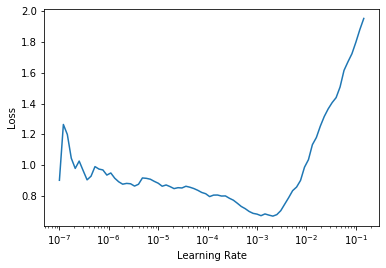

In [33]:
learn.lr_find()

##### New one

In [35]:
learn = cnn_learner(train_dl, _model_arch, metrics=error_rate)

In [36]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.683360,0.151740,0.031359,00:10
1,0.853253,0.164168,0.031359,00:09
2,0.574556,0.129877,0.017422,00:09
3,0.437855,0.104472,0.010453,00:09
4,0.353450,0.101721,0.017422,00:09
5,0.316756,0.104562,0.015679,00:09


In [37]:
my_test_metrics(learn, test_path)

(1.504557196299235, 0.6333333333333333)

SuggestedLRs(lr_min=3.981071640737355e-05, lr_steep=6.309573450380412e-07)

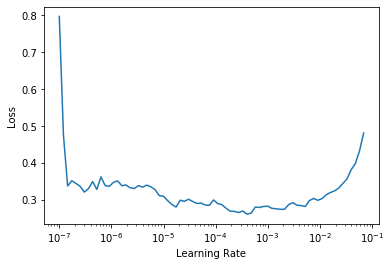

In [38]:
learn.lr_find()

In [39]:
learn.fine_tune(1, base_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.314758,0.105223,0.015679,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.297855,0.092129,0.010453,00:13


In [40]:
my_test_metrics(learn, test_path)

(1.6427634636561075, 0.6)

In [41]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.378380,0.222934,0.074913,00:13
1,0.537623,0.639254,0.203833,00:13
2,0.563934,0.094409,0.010453,00:13
3,0.389775,0.175773,0.041812,00:13
4,0.325199,0.074712,0.010453,00:13
5,0.285700,0.084264,0.008711,00:13
6,0.260558,0.068331,0.006969,00:13
7,0.195818,0.078026,0.006969,00:13
8,0.138512,0.068931,0.006969,00:13
9,0.133452,0.071126,0.006969,00:13


In [42]:
my_test_metrics(learn, test_path)

(1.0966225822766622, 0.6)